In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
%matplotlib inline
sn.set()

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/lifegivesyoulemons/udata/master/housing.csv")
df.head()

,Per capita crime rate by town,zoned for lots over 25k sq.ft.,proportion of non-retail business,CHAS,nitric oxides concentration,Avg. room per dwelling,prop. of owner-occupied units built prior to 1940,weighted distances to bost. centres,index of accessibility to radial highways,full-value property-tax rate per $10k,pupil-teacher ratio by town,B,lower status of the population,Median value of owner-occupied homes in $1000
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#### B - 1000(Bk - 0.63)2 where Bk is the proportion of blacks by town

# Bar plot

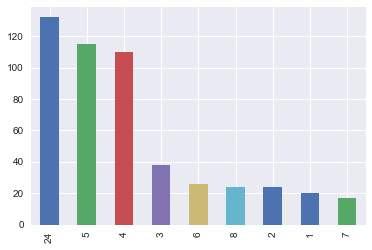

In [3]:
#index of accessibility
df.iloc[:,8].value_counts().plot('bar')

#### If index takes larger values with higher proximity to the highway, we can infer that most towns in the sample are far from it.

# Histogram

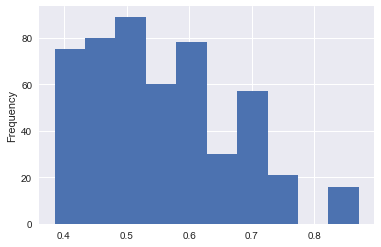

In [3]:
#nitric oxides concentration
df.iloc[:,4].plot.hist()

#### On the most, nitric pollution ranges between 0.4 and 0.7 parts per 10 million.

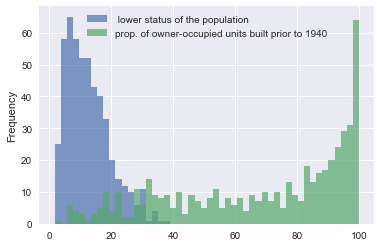

In [4]:
ratios = [' lower status of the population', 'prop. of owner-occupied units built prior to 1940']
df2 = df[ratios]
df2.plot.hist(bins = 50, alpha = 0.7)

#### Towns with poorer population have older buildings

# Area plot 

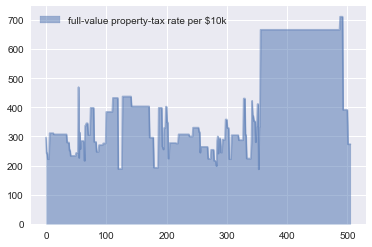

In [5]:
money = ['full-value property-tax rate per $10k']
df3 = df[money]
df3.plot.area(stacked = False)

# Scatter plot

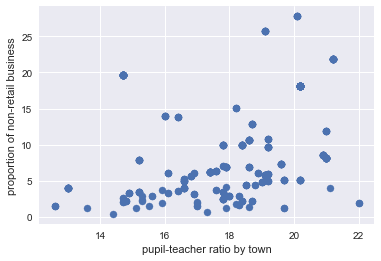

In [6]:
# Plot colored dots
df.plot.scatter(x='pupil-teacher ratio by town', y='proportion of non-retail business', s = 50)

#### There's a certain positive relationship between pupil-teacher ratio by town and proportion of non-retail business.

## Pie chart

In [7]:
df['value category'] = [1 if i<20 else 2 if (i>=20)&(i<=30) else 3 for i in df['Median value of owner-occupied homes in $1000']]

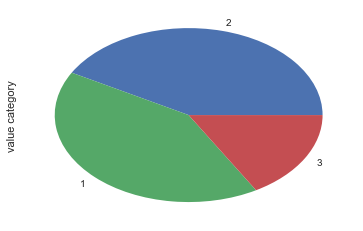

In [8]:
#breakdown by value categories (1 - cheap, 2 - medium, 3 - expensive houses)
df['value category'].value_counts().plot.pie()

## Density plot

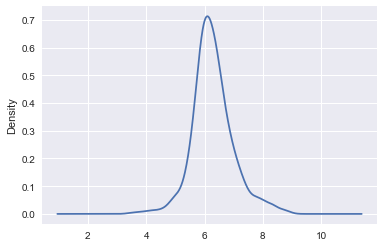

In [9]:
df['Avg. room per dwelling'].plot.density()

#### Most towns have dwellings with 6 rooms on average.

### Joint plot 

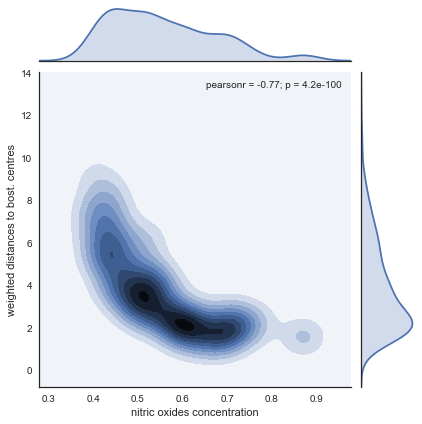

In [10]:
with sn.axes_style('white'):
    sn.jointplot("nitric oxides concentration", "weighted distances to bost. centres", df, kind='kde');

#### The further the town from the highway, the less nitric pollution is observed there.

## Pair plots

### Here I take pre-investigated variables that showed a behavior that can be moreless useful in further modeling.

In [11]:
useful = ['nitric oxides concentration', 'Avg. room per dwelling',
       'prop. of owner-occupied units built prior to 1940',
       'weighted distances to bost. centres', 'pupil-teacher ratio by town',
       ' lower status of the population',
       'Median value of owner-occupied homes in $1000']
df4 = df[useful]

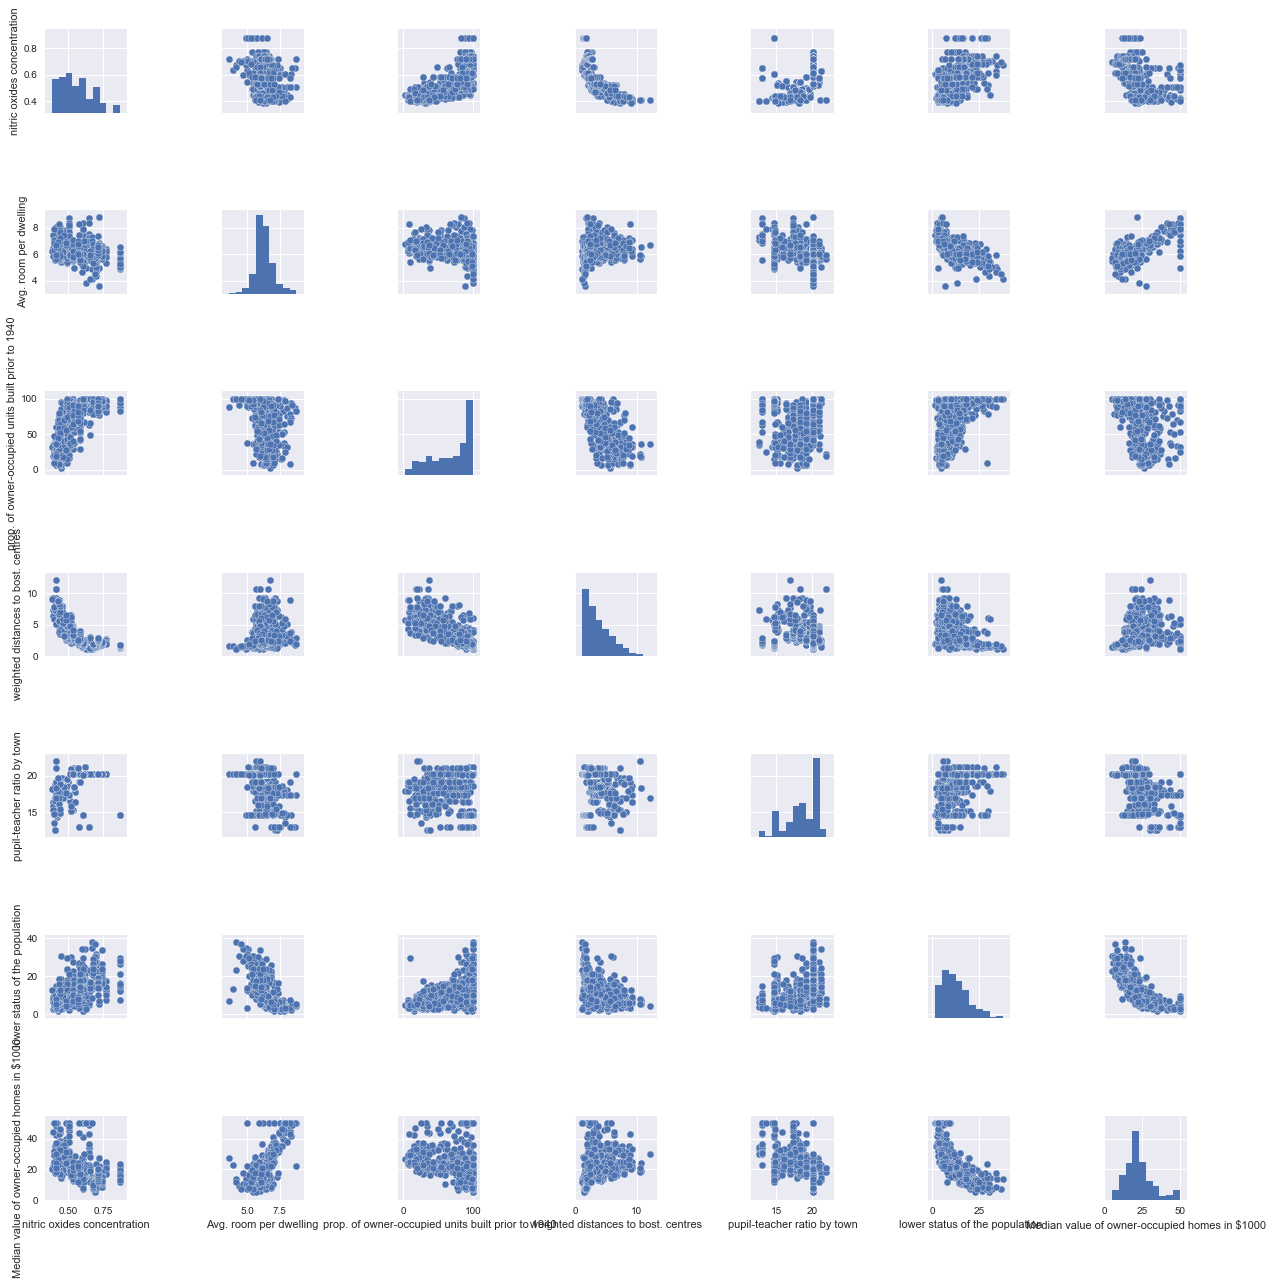

In [12]:
sn.pairplot(df4);

## Joint distributions

d:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
d:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


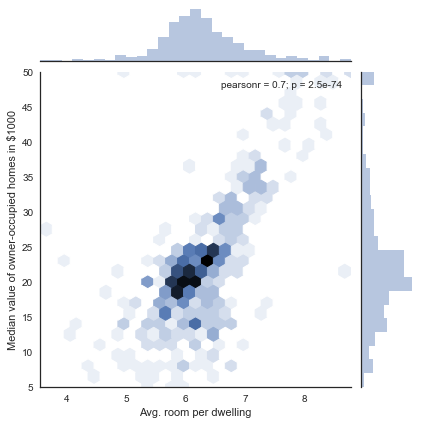

In [13]:
with sn.axes_style('white'):
    sn.jointplot('Avg. room per dwelling', 'Median value of owner-occupied homes in $1000', data=df, kind='hex')

#### Avg. room per dwelling and Median value of owner-occupied homes in thds show a certain positive joint distribution.

### Joint plot with linear regression

d:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
d:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


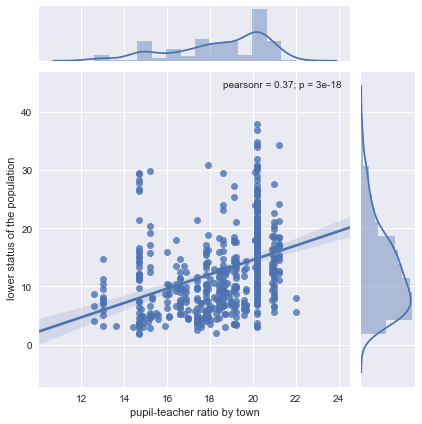

In [14]:
sn.jointplot('pupil-teacher ratio by town', ' lower status of the population', data=df, kind='reg');

## Box plots

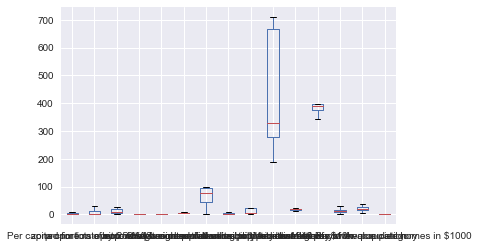

In [15]:
df.plot.box()

#### The general box-whisker doesn't show any strong outliers (maybe due to very large axis scale).

### For most of the variables the span of observations lies within inner fence, thus, there are no strong outliers in the data.
### Possibly it's due to the fact that the data is already averaged for towns.

#### Below I provide the inspection of some variables that were observed with some outliers beforehand (plots for variables without outliers are omitted).

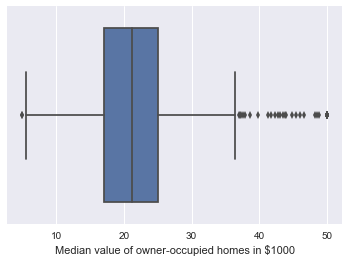

In [16]:
sn.boxplot(x=df['Median value of owner-occupied homes in $1000'])

#### Here we're able to see some minor outliers (if we use the IQR definition of outlier). Manually, we can drop these values using the following expression.

In [17]:
from scipy.stats import iqr
out = [df['Median value of owner-occupied homes in $1000'].quantile(0.25) - iqr(df['Median value of owner-occupied homes in $1000']), df['Median value of owner-occupied homes in $1000'].quantile(0.75) + iqr(df['Median value of owner-occupied homes in $1000'])]
df_out = df[(df['Median value of owner-occupied homes in $1000']>out[0]) & (df['Median value of owner-occupied homes in $1000']<out[1])]

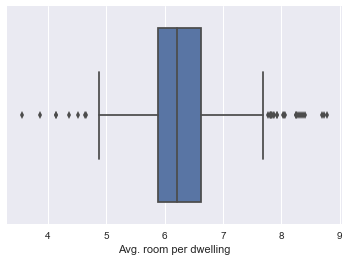

In [18]:
sn.boxplot(x=df['Avg. room per dwelling'])

In [19]:
out = [df['Avg. room per dwelling'].quantile(0.25) - iqr(df['Avg. room per dwelling']), df['Avg. room per dwelling'].quantile(0.75) + iqr(df['Avg. room per dwelling'])]
df_out = df_out[(df_out['Avg. room per dwelling']>out[0]) & (df_out['Avg. room per dwelling']<out[1])]

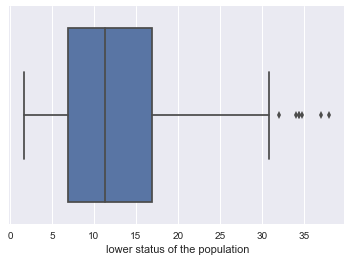

In [20]:
sn.boxplot(x=df[' lower status of the population'])

In [21]:
out = [df[' lower status of the population'].quantile(0.25) - iqr(df[' lower status of the population']), df[' lower status of the population'].quantile(0.75) + iqr(df[' lower status of the population'])]
df_out = df_out[(df_out[' lower status of the population']>out[0]) & (df_out[' lower status of the population']<out[1])]

In [22]:
np.random.seed(123)

## Function to plot correlation heatmap (analogue to corrplot in R)

In [23]:
def plot_correlation(data, columns):
    cm = np.corrcoef(data.T)
    plt.figure(figsize=(10,10))
    heatmap = sn.heatmap(cm, cbar=True, annot=True, square=True,
                         fmt='.2f', annot_kws={'size':10}, xticklabels=columns, yticklabels=columns)

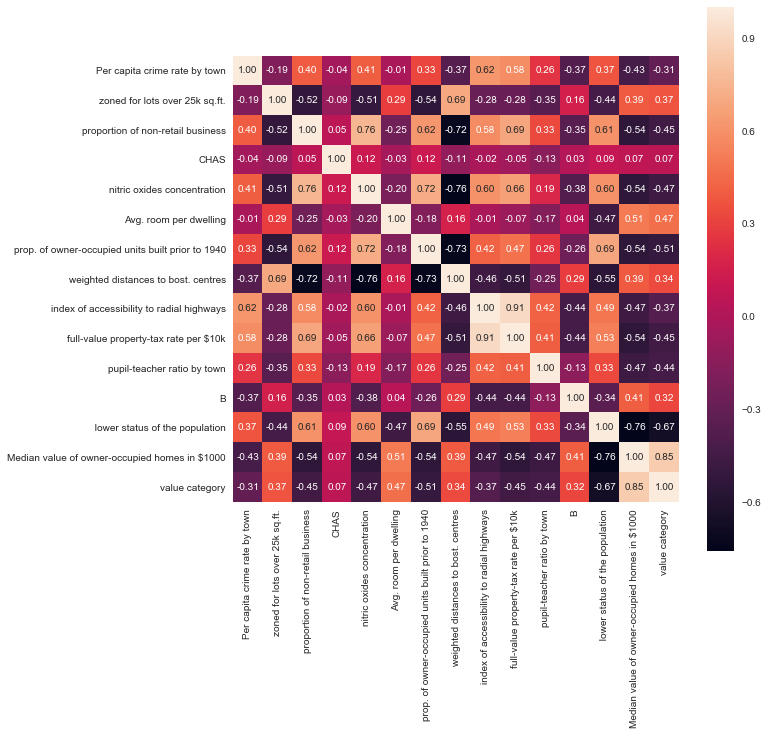

In [24]:
plot_correlation(df_out, df_out.columns)

In [25]:
# picking the house value as a target and all other variables as predictors
X = df.values[:,:-2]
y = df.values[:, -2]

In [26]:
rs = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0))
# scale X data with the scaler and assign its value to X_scaled
X_scaled = rs.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, shuffle = True, random_state = 123)

In [28]:
# function to get R^2 score of given model on given data
def test_model_r2(model, X_train, X_test, y_train, y_test):
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

test_model_r2(lr, X_train, X_test, y_train, y_test)

0.6592466510354091

#### Predictors explain 66% of variation in house value with linear regression.

In [30]:
from sklearn.linear_model import Lasso
lasso = Lasso()
test_model_r2(lasso, X_train, X_test, y_train, y_test)

0.5690564141365189

#### Using LASSO model we get only 57% of explained variation.

In [31]:
scores_lr = cross_val_score(lr, X, y, cv=6)
scores_lr.mean()

0.4001944881138546

#### If we apply 6-fold cross-validation, R2 for linear model drops to 40%.

In [32]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01)
test_model_r2(ridge, X_train, X_test, y_train, y_test)

0.6592332763101227

#### Ridge regression works pretty much like linear regression. As we decrease alpha, the score converges to the one obtained with linear regression. Remember that alpha determines the significance of penalty imposed.

In [33]:
scores_lasso = cross_val_score(lasso, X, y, cv=6)
scores_lasso.mean()

0.4207356091521695

#### 6-fold cross-validation for LASSO model works better than for linear model, however, R2 still decreases drastically compared to 1-fold model.

In [34]:
scores_ridge = cross_val_score(ridge, X, y, cv=6)
scores_ridge.mean()

0.40079175188233584

#### Ridge with CV is slightly better than linear model with CV.

In [35]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha = 0.1)
test_model_r2(en, X_train, X_test, y_train, y_test)

0.6253440052487627

#### The symbiosis of Ridge and LASSO known as ElasticNet works almost as good as linear model. Let's check whether this result is robust to cross-validation.

In [36]:
scores_en = cross_val_score(en, X, y, cv=6)
scores_en.mean()

0.448982074751023

#### Applying 6-fold cross-validation to all our models we find that ElasticNet is the best one so far, explaining 45% of variation of the target.

#### In line with three cross-validated models tested above, we can examine some boosting algorythm. For instance, let's use stochastic gradient descent.

In [37]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(alpha=0.0001, max_iter=1000, tol=0.001, shuffle = True, epsilon = 0.01, random_state = 123)
test_model_r2(sgd, X_train, X_test, y_train, y_test)

0.5871813852681131

#### Its score is higher than the scores of LM, Ridge, and LASSO with cross-validation. Hence, we can stop at this one.